In [5]:
import  pandas as pd 
df = pd.read_csv('tips.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [3]:
df.total_bill.max()

50.81

10.2 Метод plot

Метод plot
Для быстрого и корректного отображения графиков, которые мы будем строить, запустите  команду. Она позволит автоматически выводить на экран все графики и диаграммы без использования дополнительных функций.

In [6]:
%matplotlib inline

<AxesSubplot:>

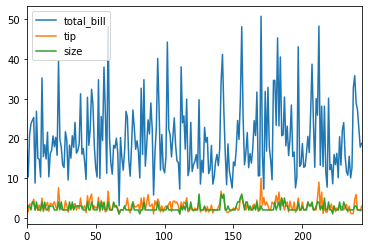

In [5]:
df.plot()

При обращении к методу plot без указания параметров компьютер построил графики для всех имеющихся в датафрейме количественных признаков. При этом на графике по оси х отложены порядковые номера данных в датафрейме (индексы), а по оси y — значения показателей.

Настройка параметров метода
Если применить метод plot не ко всему датафрейму, а только к одному столбцу, а в качестве одного из параметров указать тип диаграммы (например, тип hist), то мы получим гистограмму распределения признака:



<AxesSubplot:ylabel='Frequency'>

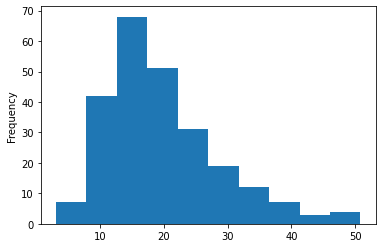

In [6]:
df['total_bill'].plot(kind = 'hist')

Добавление параметров grid и title дополнит отображаемую диаграмму несколькими деталями:

<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>

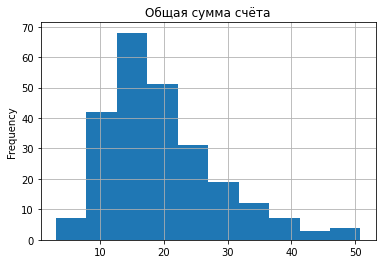

In [7]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

Для работы с категориальными (нечисловыми) переменными с помощью метода plot датафрейм необходимо предварительно обработать. Если мы хотим увидеть распределение посетителей по дням недели, нужно посчитать, сколько заказов пришлось на каждый из дней. Сделать это можно с помощью метода value_counts(), а уже к получившемуся датафрейму применить метод plot. Тип графика, который мы будем использовать, — bar (столбчатая диаграмма). Чтобы все столбцы были одного цвета, введём параметр colormap со значением coolwarm:

<AxesSubplot:title={'center':'Количество посетителей по дням'}>

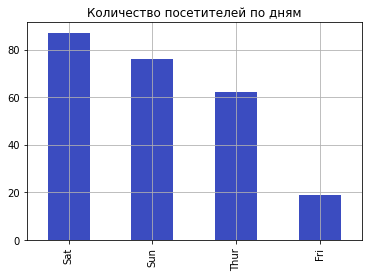

In [6]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

С помощью какого кода можно получить такой график?
df['sex', 'smoker'].value_counts().plot(kind = 'bar', grid= True)
<!-- df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True) верно -->
df.pivot_table(index = 'sex', column = 'smoker', values = 'tip').plot(kind = 'bar', grid= True)


<AxesSubplot:xlabel='sex,smoker'>

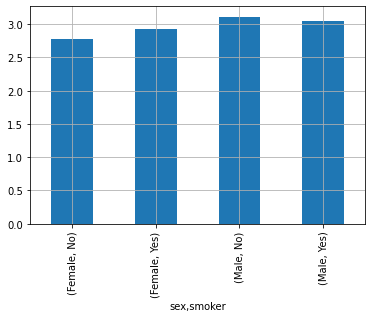

In [11]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True)


10.3 Отображение двух показателей на графике

Отображение двух показателей на графике
Метод plot позволяет использовать параметр subplots, который принимает логические значения True или False. При установке значения True можно разместить несколько графиков в одной рабочей области:

array([<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Сумма чаевых'}, ylabel='Frequency'>],
      dtype=object)

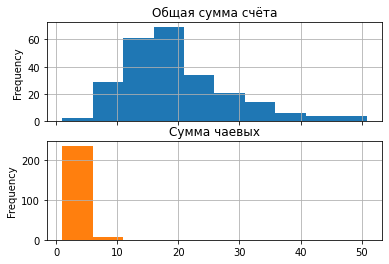

In [7]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

Такой вариант отображения графиков показывает, в каких пределах изменяются оба признака, но ничего не говорит о том, есть ли какая-то связь между суммой по счёту и суммой чаевых. Для получения такой информации мы можем построить график типа scatter plot:

<AxesSubplot:title={'center':'Общая сумма счёта Vs сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

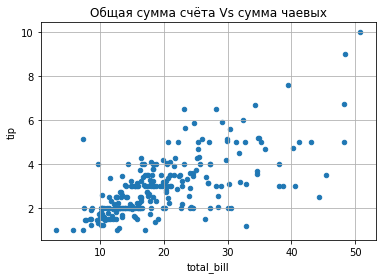

In [8]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

На этом графике можно увидеть, что более щедрые чаевые обычно оставляют посетители, которые делают более дорогие заказы, а также видны исключения из правила.

Если нам нужно совместить на графике несколько качественных и количественных показателей, то датафрейм следует предварительно обработать. Например, если мы хотим отобразить средние значения суммы счёта и размера чаевых по дням недели, то потребуется такой код:

<AxesSubplot:xlabel='day'>

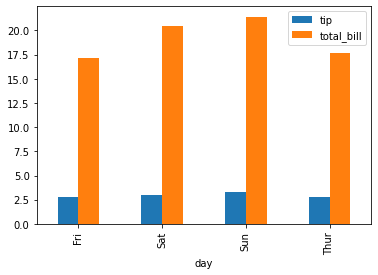

In [11]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

<AxesSubplot:xlabel='sex,smoker'>

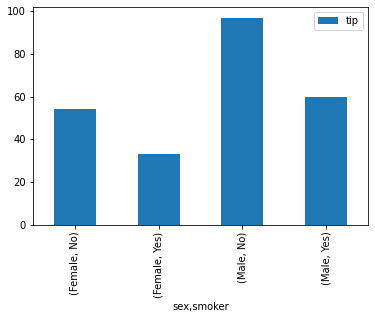

In [13]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

Задание 2
Какой вариант кода лучше всего подходит для построения графика, отображающего среднюю сумму чаевых, которые оставляют курящие и некурящие посетители?

<!-- df.groupby('smoker')['tip'].mean().plot(kind = 'bar') верно -->
df['smoker'].value_counts().plot(kind = 'bar')
df.groupby('smoker')['tip'].count().plot(kind = 'bar')
df['smoker', 'tip'].plot(kind = 'scatter')

<AxesSubplot:xlabel='smoker'>

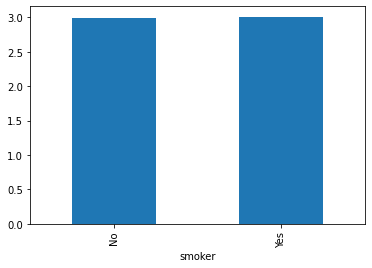

In [14]:
df.groupby('smoker')['tip'].mean().plot(kind = 'bar') 